In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = "/data/notebook_files/ICRISAT-District Level Data-3.csv"
data = pd.read_csv(file_path)
data = data[data != -1].dropna()

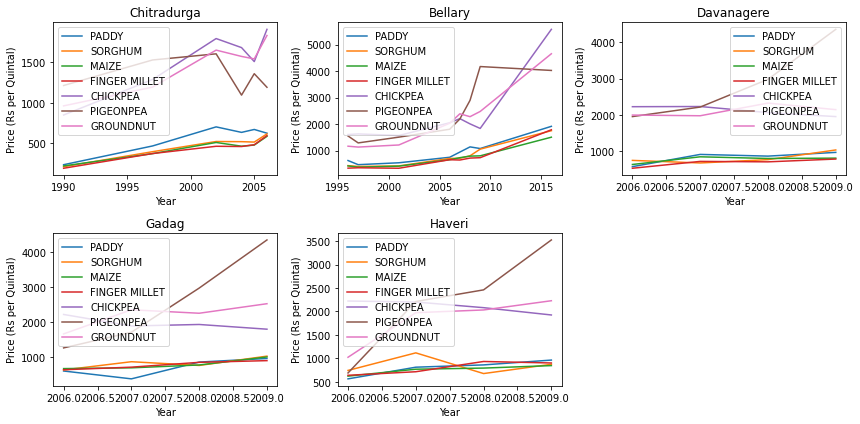

In [4]:
plt.figure(figsize=(12, 6))

districts = data['Dist Name'].unique()

# Set the number of rows and columns for facets
rows = 2
cols = 3

# Create subplots for each district
for i, district in enumerate(districts):
    district_data = data[data['Dist Name'] == district]

    plt.subplot(rows, cols, i+1)
    for crop in district_data.columns[5:]:
        plt.plot(district_data['Year'], district_data[crop], label=crop)

    plt.xlabel("Year")
    plt.ylabel("Price (Rs per Quintal)")
    plt.title(f"{district}")
    plt.legend()

plt.tight_layout()
plt.show()

In [5]:
file_path = "/data/notebook_files/ICRISAT-District Level Data-3.csv"
data = pd.read_csv(file_path)

print(data.head)

<bound method NDFrame.head of      Dist Code  Year  State Code State Name    Dist Name   PADDY  SORGHUM  \
0           72  1990           5  Karnataka  Chitradurga   235.0    210.0   
1           72  1991           5  Karnataka  Chitradurga   333.0     -1.0   
2           72  1992           5  Karnataka  Chitradurga   329.0    200.0   
3           72  1993           5  Karnataka  Chitradurga    -1.0     -1.0   
4           72  1994           5  Karnataka  Chitradurga   488.0     -1.0   
..         ...   ...         ...        ...          ...     ...      ...   
106       1014  2012           5  Karnataka       Haveri    -1.0   1209.0   
107       1014  2013           5  Karnataka       Haveri    -1.0   1300.0   
108       1014  2014           5  Karnataka       Haveri    -1.0   1168.0   
109       1014  2015           5  Karnataka       Haveri  1488.0   1439.0   
110       1014  2016           5  Karnataka       Haveri  1793.0   2024.0   

      MAIZE  FINGER MILLET  CHICKPEA  PIGEONP

In [6]:
inflation_data = pd.read_csv("/data/notebook_files/inflation_index.csv")
print(inflation_data.head())

     Year  Inflation Index
0  1960.0         3.068381
1  1961.0         3.141976
2  1962.0         3.255201
3  1963.0         3.374086
4  1964.0         3.725082


In [7]:
data = pd.merge(data, inflation_data, on="Year")
print(data)

     Dist Code  Year  State Code State Name    Dist Name   PADDY  SORGHUM  \
0           72  1990           5  Karnataka  Chitradurga   235.0    210.0   
1           73  1990           5  Karnataka      Bellary    -1.0    213.0   
2           72  1991           5  Karnataka  Chitradurga   333.0     -1.0   
3           73  1991           5  Karnataka      Bellary    -1.0    314.0   
4           72  1992           5  Karnataka  Chitradurga   329.0    200.0   
..         ...   ...         ...        ...          ...     ...      ...   
106         72  2016           5  Karnataka  Chitradurga  1100.0     -1.0   
107         73  2016           5  Karnataka      Bellary  1914.0   1749.0   
108       1012  2016           5  Karnataka   Davanagere  1891.0   1571.0   
109       1013  2016           5  Karnataka        Gadag    -1.0   1617.0   
110       1014  2016           5  Karnataka       Haveri  1793.0   2024.0   

      MAIZE  FINGER MILLET  CHICKPEA  PIGEONPEA  GROUNDNUT  Inflation Index

     Dist Code  Year  State Code State Name    Dist Name        PADDY  \
0           72  1990           5  Karnataka  Chitradurga   843.952963   
2           72  1991           5  Karnataka  Chitradurga  1053.727378   
4           72  1992           5  Karnataka  Chitradurga   930.661658   
6           72  1993           5  Karnataka  Chitradurga  1075.165467   
8           72  1994           5  Karnataka  Chitradurga  1161.918272   
10          72  1995           5  Karnataka  Chitradurga  1040.878069   
12          72  1996           5  Karnataka  Chitradurga  1044.230408   
14          72  1997           5  Karnataka  Chitradurga   931.191931   
16          72  1998           5  Karnataka  Chitradurga  1199.625876   
21          72  1999           5  Karnataka  Chitradurga  1108.636450   
26          72  2000           5  Karnataka  Chitradurga   920.033927   
31          72  2001           5  Karnataka  Chitradurga   760.359250   
36          72  2002           5  Karnataka  Chitra

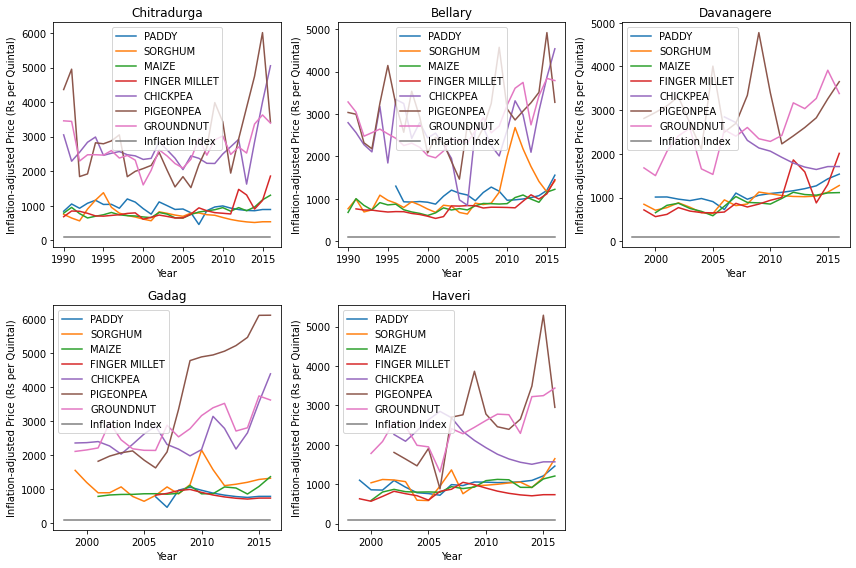

In [22]:


# Create facets for each district
plt.figure(figsize=(12, 8))

# Get unique districts
districts = data['Dist Name'].unique()

# Set the number of rows and columns for facets
rows = 2
cols = 3

# Create subplots for each district
for i, district in enumerate(districts):
    district_data = data[data['Dist Name'] == district]
   
    plt.subplot(rows, cols, i+1)

# Calculate inflation adjusted prices crop-wise
    for crop in district_data.columns[5:]:
        district_data = district_data.replace(-1, np.nan)
        district_data = district_data.interpolate(method="linear")

        inflation_adjusted_prices = district_data[crop] / (district_data['Inflation Index'] / 100)
        district_data[crop] = inflation_adjusted_prices

        plt.plot(district_data['Year'], inflation_adjusted_prices, label=crop)



    print(district_data) 
    plt.xlabel("Year")
    plt.ylabel("Inflation-adjusted Price (Rs per Quintal)")
    plt.title(f"{district}")
    plt.legend()

    output_file = f"{district}_inflation_adjusted_prices.csv"
    district_data.to_csv(output_file, index=False)



plt.tight_layout()
plt.show()








